In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def set_up_sketch_x_position() -> "ax2":
    """
    this method is used for sketching
    :return: it returns ax2
    """

    # xticks = np.arange(0, 60, 5)
    #Create a Plot
    fig, ax2 = plt.subplots(figsize=(10, 10))
    #https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html
    ax2.tick_params(axis="both", length=15, direction="inout", color="blue", labelcolor="red")
    ax2.spines["bottom"].set_color("red")
    ax2.spines["left"].set_color("red")
    # ax2.set_xticks(xticks)
    ax2.set_xlabel("Position(m)", color="red")
    ax2.set_xlabel("Position(m)", color="red")
    ax2.set_ylabel("Simulation time(second)", color="red")
    ax2.grid("on", alpha=0.2)
    return ax2

New Algorithm (Revised): This algorithm increments time automatically, and the length of preceding car has been considered in the calculation according to its real value in the simulation

In [3]:
# insert the path to the csv file here
vehicle_routes_cc0_new_algorithm= pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 3.csv")
#change the vehicle type from number to name to have a better visualization
vehicle_routes_cc0_new_algorithm['VEHTYPE'].replace(to_replace=[100, 150, 200, 300],
                                                value=["Car", "Transporter", "HGV", "Bus"],
                                                inplace=True)
len(vehicle_routes_cc0_new_algorithm)
# show the unique cars
number_of_cars_cc0_new_algorithm = vehicle_routes_cc0_new_algorithm["$VEHICLE:NO"].unique()
# total number of cars in the network
print(f"total number of cars in the network: {len(number_of_cars_cc0_new_algorithm)}")


total number of cars in the network: 4090


Simulation time in which vehicles were detected:2499sec
vehicle_number is 1523
vehicle_number is 1533


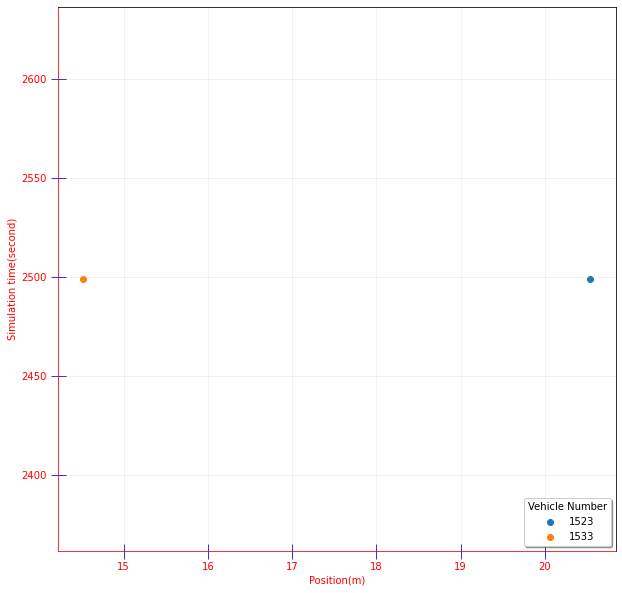

In [4]:
# For Visualization only
for time in range(2000, 7200):
    all_cars_on_link_54_cc0_new_algorithm = vehicle_routes_cc0_new_algorithm[
        (vehicle_routes_cc0_new_algorithm["LANE\\LINK\\NO"] == 54) & (vehicle_routes_cc0_new_algorithm["SIMSEC"] == time)]
    all_cars_on_link_54_CC0_new_algorithm_speedZero = all_cars_on_link_54_cc0_new_algorithm[
        (all_cars_on_link_54_cc0_new_algorithm["SPEED"] == 0) & (all_cars_on_link_54_cc0_new_algorithm["LANE\INDEX"] == 1)]
    cars_cc0_new_algorithm= all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"].unique()
    if len(cars_cc0_new_algorithm) < 2:
        continue
    print(f"Simulation time in which vehicles were detected:{time}sec")

    ax2 = set_up_sketch_x_position()
    # sketch the information with x axis with position
    for car_number in cars_cc0_new_algorithm:
        print(f"vehicle_number is {car_number}")
        specific_car = all_cars_on_link_54_CC0_new_algorithm_speedZero[
            all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"] == car_number]

        ax2.scatter(specific_car["POS"], specific_car["SIMSEC"], label=car_number)

    #set upd legends
    ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");

    # plt.savefig("data/CC0/Scenarios generated by Marco/following cars scenario2")
    break

In [5]:
# Calculate the distance
all_vehicles_speedZero_positionFromBeginningOfLink_new_algorithm  = {}
# For each car in a Queue, on the mentioned Street, within the simulation time specified:
for car_number in cars_cc0_new_algorithm:
    # Track that vehicle
    specific_car = all_cars_on_link_54_CC0_new_algorithm_speedZero[
        all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"] == car_number]
    # get its position from the beginning of the link, and store it in a dictionary whose Key is the vehicle's number,
    # and its Value is its position from the beginning of the link
    all_vehicles_speedZero_positionFromBeginningOfLink_new_algorithm[car_number] = specific_car["POS"].iloc[0]
# sort the dictionary in descending order so that one can find the order of vehicles in a Queue
# [(vehicle_number, position),(vehicle_number, position),(vehicle_number, position)]
sorted_vehicles_in_queue_new_algorithm = sorted(all_vehicles_speedZero_positionFromBeginningOfLink_new_algorithm.items(), key=lambda x: x[1], reverse=True)
distance_between_each_vehicle_new_algorithm = []
for i in range(0, len(sorted_vehicles_in_queue_new_algorithm) - 1):
    car_number_whose_length_mustbeMeasured = sorted_vehicles_in_queue_new_algorithm[i][0]
    length_of_preceding_car = all_cars_on_link_54_CC0_new_algorithm_speedZero[
            all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"] == car_number_whose_length_mustbeMeasured]["LENGTH"].iloc[0]
    distance_between_each_vehicle_new_algorithm.append(sorted_vehicles_in_queue_new_algorithm[i][1] - length_of_preceding_car - sorted_vehicles_in_queue_new_algorithm[i + 1][1])

# Create a pandas series to calculate the mean value and consider it as the value of CC0
series_distance_between_each_vehicle_new_algorithm = pd.Series(distance_between_each_vehicle_new_algorithm)
CC0 = series_distance_between_each_vehicle_new_algorithm.mean()
print(f"the Value of CC0 with a new revised algorithm is {CC0}m")


the Value of CC0 with a new revised algorithm is 2.0100000000000016m


New Algorithm which increments time automatically. the length of preceding car has been considered as a constant value of 4.5m

In [6]:
# insert the path to the csv file here
vehicle_routes_cc0_new_algorithm= pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 3.csv")
#change the vehicle type from number to name to have a better visualization
vehicle_routes_cc0_new_algorithm['VEHTYPE'].replace(to_replace=[100, 150, 200, 300],
                                                value=["Car", "Transporter", "HGV", "Bus"],
                                                inplace=True)
len(vehicle_routes_cc0_new_algorithm)
# show the unique cars
number_of_cars_cc0_new_algorithm = vehicle_routes_cc0_new_algorithm["$VEHICLE:NO"].unique()
# total number of cars in the network
print(f"Total number of cars in the network is {len(number_of_cars_cc0_new_algorithm)}")


Total number of cars in the network is 4090


Simulation time in which vehicles were detected:2499sec
vehicle_number is 1523
vehicle_number is 1533


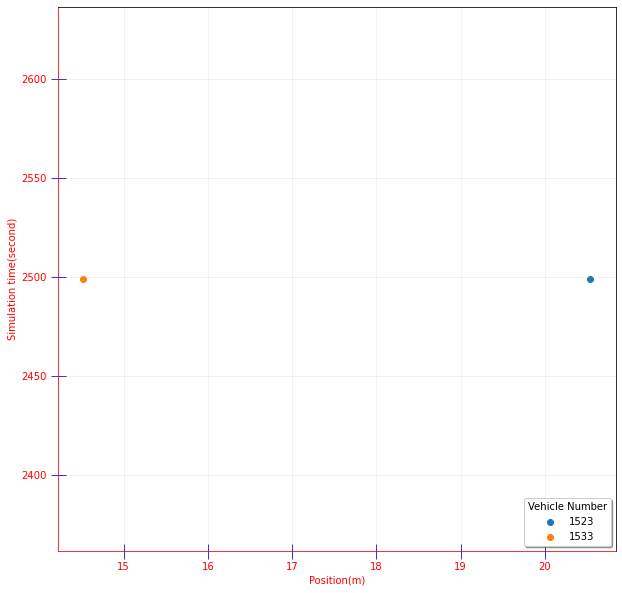

In [7]:
# For Visualization only
for time in range(2000, 7200):
    all_cars_on_link_54_cc0_new_algorithm = vehicle_routes_cc0_new_algorithm[
        (vehicle_routes_cc0_new_algorithm["LANE\\LINK\\NO"] == 54) & (vehicle_routes_cc0_new_algorithm["SIMSEC"] == time)]
    all_cars_on_link_54_CC0_new_algorithm_speedZero = all_cars_on_link_54_cc0_new_algorithm[
        (all_cars_on_link_54_cc0_new_algorithm["SPEED"] == 0) & (all_cars_on_link_54_cc0_new_algorithm["LANE\INDEX"] == 1)]
    cars_cc0_new_algorithm= all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"].unique()
    if len(cars_cc0_new_algorithm) < 2:
        continue
    print(f"Simulation time in which vehicles were detected:{time}sec")

    # scenario 2
    ax2 = set_up_sketch_x_position()
    # sketch the information with x axis with position
    for car_number in cars_cc0_new_algorithm:
        print(f"vehicle_number is {car_number}")
        specific_car = all_cars_on_link_54_CC0_new_algorithm_speedZero[
            all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"] == car_number]

        ax2.scatter(specific_car["POS"], specific_car["SIMSEC"], label=car_number)

    #set upd legends
    ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");

    # plt.savefig("data/CC0/Scenarios generated by Marco/following cars scenario2")
    break

In [8]:
# Calculate the distance
all_vehicles_speedZero_positionFromBeginningOfLink_new_algorithm  = {}
# For each car in a Queue, on the mentioned Street, within the simulation time specified:
for car_number in cars_cc0_new_algorithm:
    # Track that vehicle
    specific_car = all_cars_on_link_54_CC0_new_algorithm_speedZero[
        all_cars_on_link_54_CC0_new_algorithm_speedZero["$VEHICLE:NO"] == car_number]
    # get its position from the beginning of the link, and store it in a dictionary whose Key is the vehicle's number,
    # and its Value is its position from the beginning of the link
    all_vehicles_speedZero_positionFromBeginningOfLink_new_algorithm[car_number] = specific_car["POS"].iloc[0]
# sort the dictionary in descending order so that one can find the order of vehicles in a Queue
# [(vehicle_number, position),(vehicle_number, position),(vehicle_number, position)]
sorted_vehicles_in_queue_new_algorithm = sorted(all_vehicles_speedZero_positionFromBeginningOfLink_new_algorithm.items(), key=lambda x: x[1], reverse=True)
distance_between_each_vehicle_new_algorithm = []
for i in range(0, len(sorted_vehicles_in_queue_new_algorithm) - 1):
    distance_between_each_vehicle_new_algorithm.append(sorted_vehicles_in_queue_new_algorithm[i][1] - 4.5 - sorted_vehicles_in_queue_new_algorithm[i + 1][1])

# Create a pandas series to calculate the mean value and consider it as the value of CC0
series_distance_between_each_vehicle_new_algorithm = pd.Series(distance_between_each_vehicle_new_algorithm)
CC0 = series_distance_between_each_vehicle_new_algorithm.mean()
print(f"the Value of CC0 with a new algorithm is {CC0}m")


the Value of CC0 with a new algorithm is 1.5199999999999996m


Old Algorithm, simulation time should be specified manually


In [9]:
# Here you can pass the path to the csv file
vehicle_routes_cc0_old_algorithm = pd.read_csv("data/Scenarios generated by Marco/GothaerPlatz - Scenario 3.csv")
#change the vehicle type from number to name to have a better visualization
vehicle_routes_cc0_old_algorithm['VEHTYPE'].replace(to_replace=[100, 150, 200, 300],
                                                    value=["Car", "Transporter", "HGV", "Bus"],
                                                    inplace=True)
# first check the number
len(vehicle_routes_cc0_old_algorithm)
# show the unique cars
number_of_cars_cc0_onePointFive = vehicle_routes_cc0_old_algorithm["$VEHICLE:NO"].unique()
# total number of cars in the network in the scenario2
len(number_of_cars_cc0_onePointFive)

4090

In [10]:
# Check the Dataset
vehicle_routes_cc0_old_algorithm.head()

,$VEHICLE:NO,SIMTMOFDAY,SIMSEC,POS,POSLAT,VEHTYPE,SPEED,ACCELERATION,DISTTRAVTOT,LENGTH,LANE\LINK\NO,LANE\INDEX
0,1,00:00:00.50,0.5,0.52,0.5,Car,52.98,0.0,1.47,4.01,24,1
1,1,00:00:00.60,0.6,1.99,0.5,Car,52.98,0.0,2.94,4.01,24,1
2,1,00:00:00.70,0.7,3.46,0.5,Car,52.98,0.0,4.42,4.01,24,1
3,1,00:00:00.80,0.8,4.93,0.5,Car,52.98,0.0,5.89,4.01,24,1
4,1,00:00:00.90,0.9,6.40,0.5,Car,52.98,0.0,7.36,4.01,24,1


623


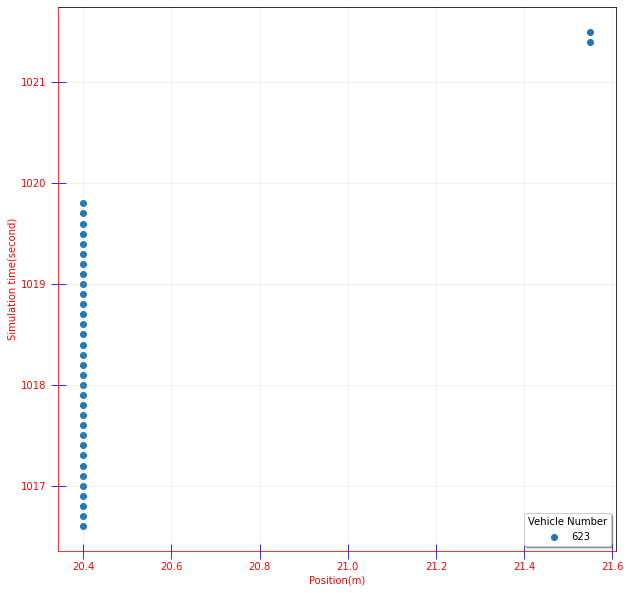

In [11]:
# Link 54 is GothaerStreet SW-N part 5 To HeinrichStreet SE-N part 1
#Here you can change the Simulation time (SIMSEC)
all_cars_on_link_54_cc0_onePointFive = vehicle_routes_cc0_old_algorithm[
    (vehicle_routes_cc0_old_algorithm["LANE\\LINK\\NO"] == 54) & (vehicle_routes_cc0_old_algorithm["SIMSEC"] < 1090) & (
            vehicle_routes_cc0_old_algorithm["SIMSEC"] > 1000)]
# find all the vehicles whose speed is zero and are on one Lane
all_cars_on_link_54_CC0_onePointFive_speedZero = all_cars_on_link_54_cc0_onePointFive[
    (all_cars_on_link_54_cc0_onePointFive["SPEED"] == 0) & (all_cars_on_link_54_cc0_onePointFive["LANE\INDEX"] == 1)]
cars_cc0_onePointFive = all_cars_on_link_54_CC0_onePointFive_speedZero["$VEHICLE:NO"].unique()
# sketch the diagram (x axis is position)
ax2 = set_up_sketch_x_position()
# For every car in a Queue, extract its vehicle_number, and print it on the console so that user can see it
for car_number in cars_cc0_onePointFive:
    print(car_number)
    # Go and find the car, and track it within the simulation time mentioned
    specific_car = all_cars_on_link_54_CC0_onePointFive_speedZero[
        all_cars_on_link_54_CC0_onePointFive_speedZero["$VEHICLE:NO"] == car_number]
    ax2.scatter(specific_car["POS"], specific_car["SIMSEC"], label=car_number)

ax2.legend(loc="lower right", shadow="true", fancybox=True, title="Vehicle Number");

# plt.savefig("data/CC0/CC0 is 1 point 5.png")

In [12]:
# Calculate the distance

all_vehicles_speedZero_positionFromBeginningOfLink = {}
# For each car in a Queue, on the mentioned Street, within the simulation time specified:
for car_number in cars_cc0_onePointFive:
    print(car_number)
    # Track that vehicle
    specific_car = all_cars_on_link_54_CC0_onePointFive_speedZero[
        all_cars_on_link_54_CC0_onePointFive_speedZero["$VEHICLE:NO"] == car_number]
    # get its position from the beginning of the link, and store it in a dictionary whose Key is the vehicle's number,
    # and its Value is its position from the beginning of the link
    all_vehicles_speedZero_positionFromBeginningOfLink[car_number] = specific_car["POS"].iloc[1]
# sort the dictionary in descending order so that one can find the order of vehicles in a Queue
# [(vehicle_number, position),(vehicle_number, position),(vehicle_number, position)]
sorted_vehicles_in_queue = sorted(all_vehicles_speedZero_positionFromBeginningOfLink.items(), key=lambda x: x[1], reverse=True)
distance_between_each_vehicle = []
for i in range(0, len(sorted_vehicles_in_queue) - 1):
    #4.5 is the length of preceding vehicle. its value can also be derived from the length attribute from trajectory file
    distance_between_each_vehicle.append(sorted_vehicles_in_queue[i][1] - 4.5 - sorted_vehicles_in_queue[i + 1][1])

# Create a pandas series to calculate the mean value and consider it as the value of CC0
series_distance_between_each_vehicle = pd.Series(distance_between_each_vehicle)
CC0 = series_distance_between_each_vehicle.mean()
print(f"the Value of CC0 is {CC0}m (simulation time was manually specified)")
print("Note: if the value of CC0 is nan, change the simulation time")








623
the Value of CC0 is nanm (simulation time was manually specified)
Note: if the value of CC0 is nan, change the simulation time


D:\program files\Anaconda\envs\Python-Anaconda-Vissim\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
